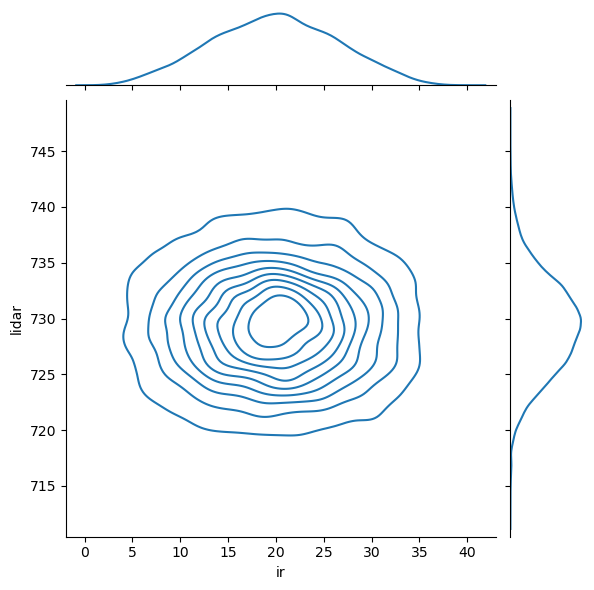

In [19]:
# 2.5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt", delimiter=" ", header=None, names = ("date","time","ir","lidar"))
d = data[(data["time"] < 160000) & (data["time"] > 120000)] # 12時から16時のデータだけ抽出
d = d.loc[:, ["ir","lidar"]] # ???

#旧API仕様 sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
sns.jointplot(data=d, x="ir", y="lidar", kind = "kde")
plt.show()


In [14]:
print("光センサの計測値の分散",d.ir.var())
print("LiDARの計測値の分散",d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散:", sum(a)/(len(d)-1))

d.mean()


光センサの計測値の分散 42.11952074692658
LiDARの計測値の分散 17.70250147019656
共分散: -0.31746881654543757


ir        19.860449
lidar    729.312191
dtype: float64

In [15]:
d.cov()

,ir,lidar
ir,42.119521,-0.317469
lidar,-0.317469,17.702501


In [16]:
from scipy.stats import multivariate_normal
irlidar = multivariate_normal(mean= d.mean().values.T, cov=d.cov().values)

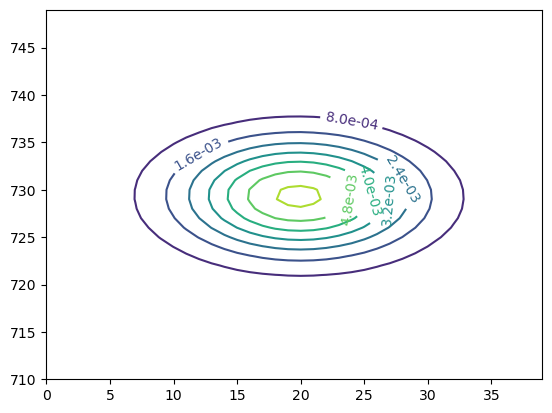

In [17]:
import numpy as np

x,y = np.mgrid[0:40, 710:750] # 2次元平面に均等にX座標、Y座標を作る
pos = np.empty(x.shape + (2,)) # xは40x40の2次元リストでこれに3次元目を加えて40x40x2のリストを作成
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x, y, irlidar.pdf(pos)) # x,y座標とそれに対する密度を算出
cont.clabel(fmt='%1.1e')                    # 等高線に値を書き込むためのフォーマット指定

plt.show()


In [18]:
print("x座標", x)
print("y座標", y)

x座標 [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
y座標 [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


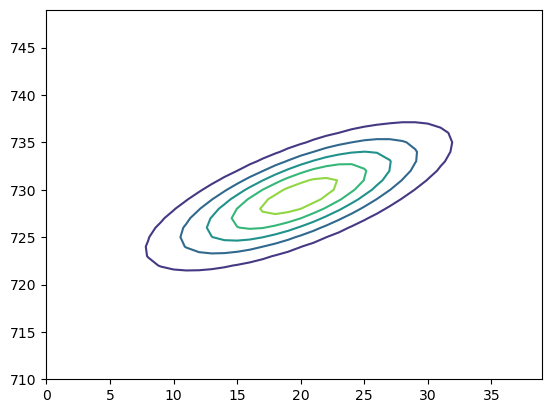

In [20]:
c = d.cov().values + np.array([[0,20], [20,0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))
plt.show()